# Effect of COVID-19 on prescribing of Dependence Forming Medicines and the associated health utilisation

Data for this research has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately ?? Jan-19, rising to approximately ?? Feb-23.

Population = patients registered, have not died and <=120 years of age.

Research population = patients registered, have not died, <=120 years of age, on a dependence forming medication and do not have cancer.

#### Report 1 -  focus on all dependence forming medications and indications over time within patients identified as being registered at a GP practice within the research period.

In [1]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

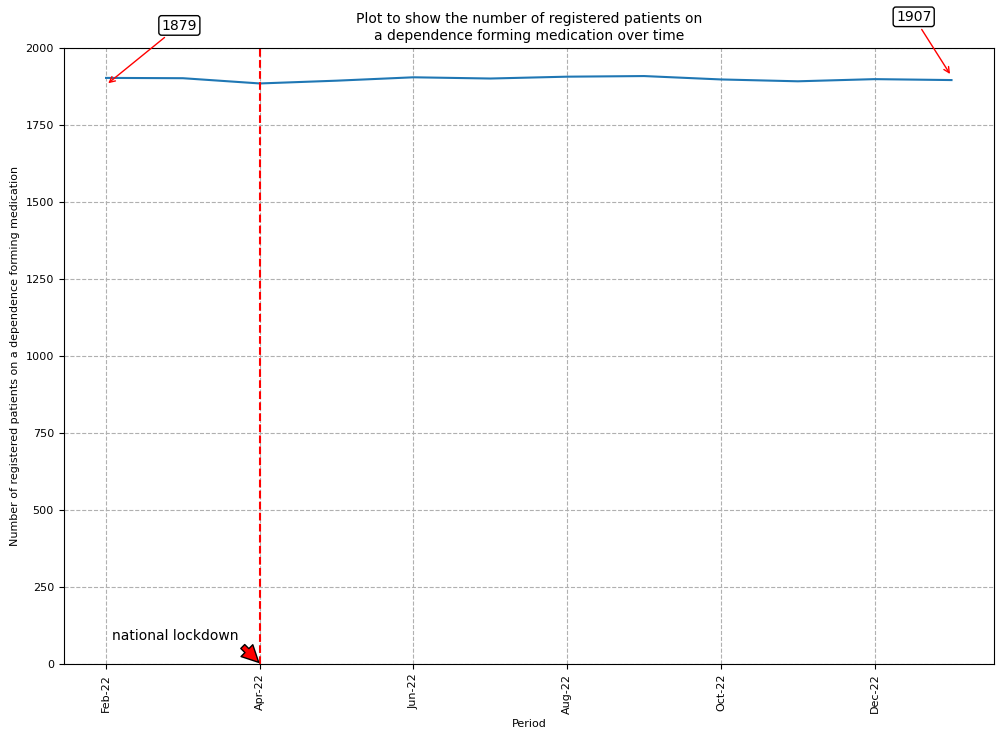

In [2]:
data_measure_medication_rate = pd.read_csv("../output/measure_medication_rate.csv", parse_dates=["date"])
data_measure_medication_rate = data_measure_medication_rate.loc[data_measure_medication_rate["research_population"] == 1, :]
df_measure_medication_rate = pd.DataFrame.pivot(data_measure_medication_rate, index='date', columns='research_population', values='with_medication')
df_measure_medication_rate.index = pd.to_datetime(df_measure_medication_rate.index).strftime('%b-%y')
ax = df_measure_medication_rate.plot(fontsize=8, figsize=(12,8))
ax.legend().remove()
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=2000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('1879',
            xy=(0, 1879), xycoords='data',
            xytext=(40, 40), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))
ax.annotate('1907',
            xy=(11, 1907), xycoords='data',
            xytext=(-40, 40), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))
title = 'Plot to show the number of registered patients on a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.grid(linestyle="dashed")
plt.ylim(ymin=0, ymax=2000)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_medication_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [3]:
print(tabulate(df_measure_medication_rate.iloc[:1], tablefmt = 'simple'))
print(tabulate(df_measure_medication_rate.iloc[-1:], tablefmt = 'simple'))

------  ----
Feb-22  1902
------  ----
------  ----
Jan-23  1895
------  ----


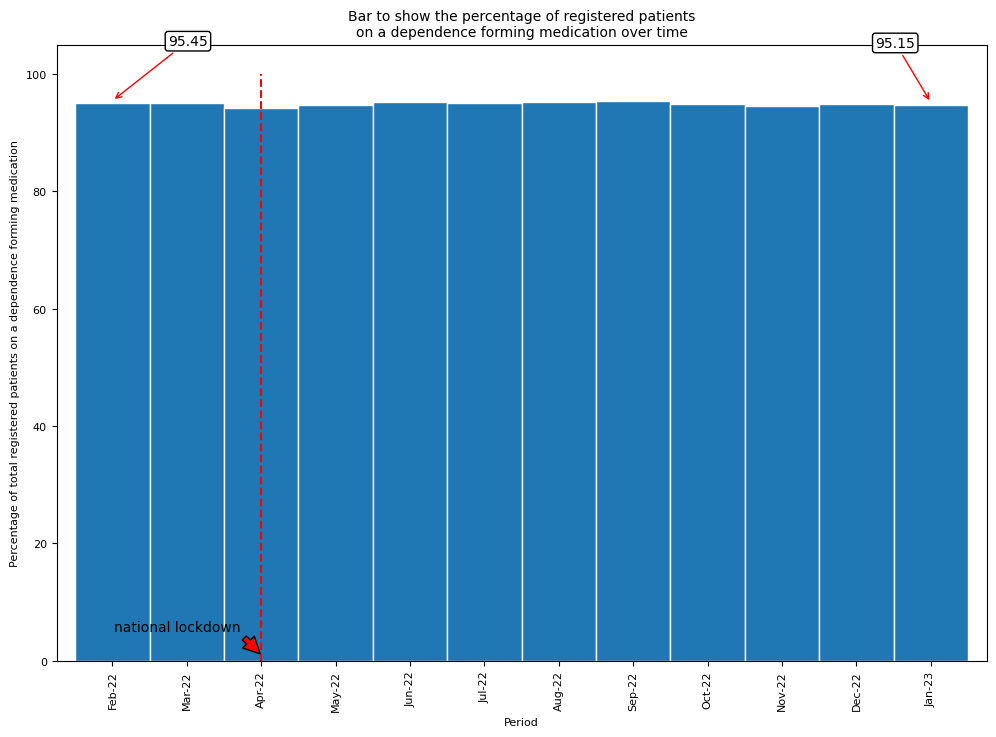

In [4]:
data_measure_medication_rate = pd.read_csv("../output/measure_medication_rate.csv", parse_dates=["date"])
data_measure_medication_rate = data_measure_medication_rate.loc[data_measure_medication_rate["research_population"] == 1, :]
data_measure_medication_rate['value'] = 100 * data_measure_medication_rate["value"]
df_measure_medication_rate = pd.DataFrame.pivot(data_measure_medication_rate, index='date', columns='research_population', values='value')
df_measure_medication_rate.index = pd.to_datetime(df_measure_medication_rate.index).strftime('%b-%y')
ax = df_measure_medication_rate.plot.bar(fontsize=8, edgecolor='white', width=1, figsize=(12,8))
ax.legend().remove()
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of total registered patients on a dependence forming medication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('95.45',
            xy=(0, 95.45), xycoords='data',
            xytext=(40, 40), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))
ax.annotate('95.15',
            xy=(11, 95.15), xycoords='data',
            xytext=(-40, 40), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))
# for bars in ax.containers:
    # ax.bar_label(bars, label_type='edge', fontsize=7)
title = 'Bar to show the percentage of registered patients on a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.savefig(f"../output/measure_medication_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()


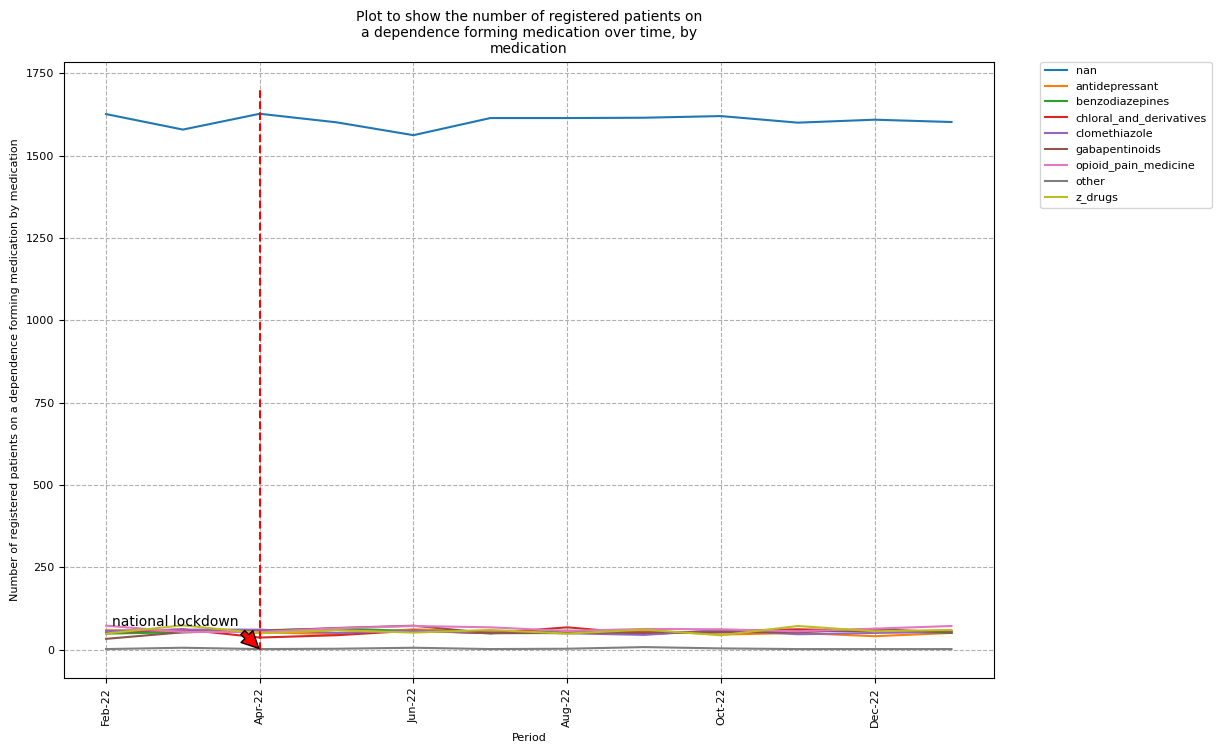

In [5]:
data_measure_dfm_medications_grouped_rate = pd.read_csv("../output/measure_dfm_medications_grouped_rate.csv", parse_dates=["date"])
df_measure_dfm_medications_grouped_rate = pd.DataFrame.pivot(data_measure_dfm_medications_grouped_rate, index='date', columns='medication', values='research_population')
df_measure_dfm_medications_grouped_rate.index = pd.to_datetime(df_measure_dfm_medications_grouped_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_grouped_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by medication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=1700,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by medication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_grouped_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()



In [6]:
print(tabulate(df_measure_dfm_medications_grouped_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_grouped_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Feb-22   1626                59                 49                         52               57                33                      73        2         49
date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Jan-23   1602                51                 51                         56               54                52                      72        2         60


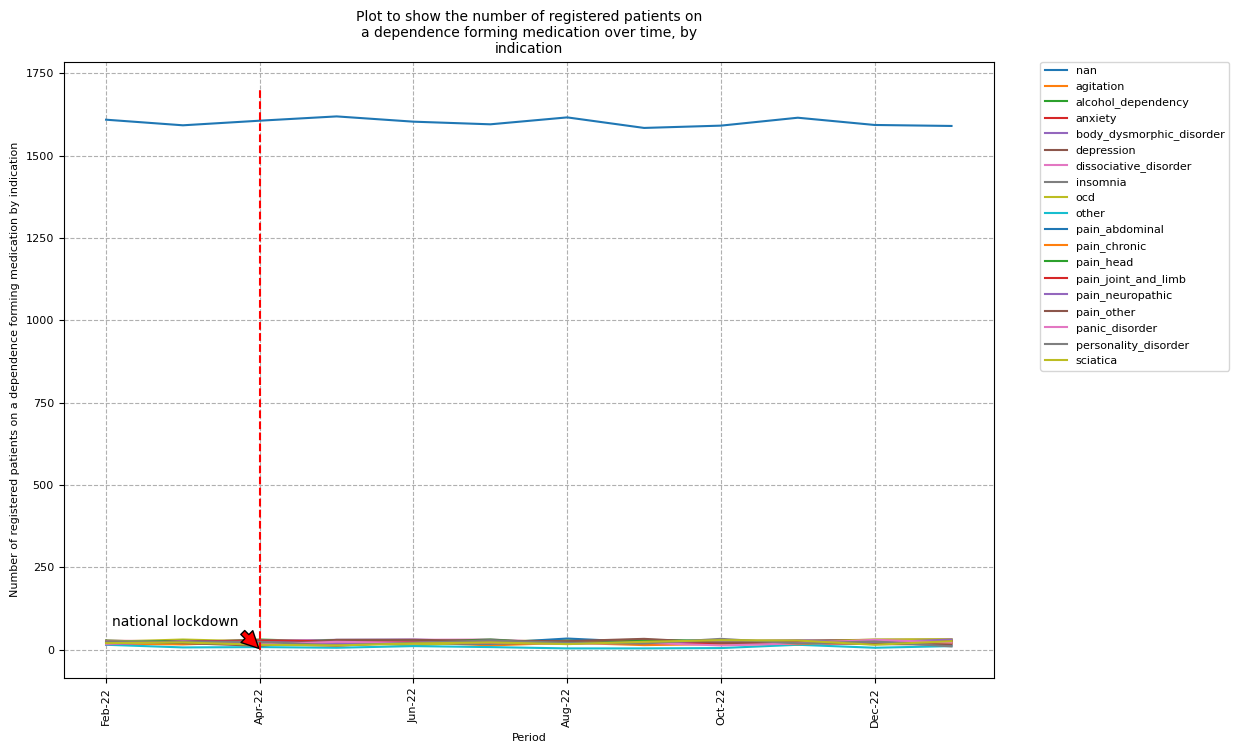

In [7]:
data_measure_dfm_indications_grouped_rate = pd.read_csv("../output/measure_dfm_indications_grouped_rate.csv", parse_dates=["date"])
df_measure_dfm_indications_grouped_rate = pd.DataFrame.pivot(data_measure_dfm_indications_grouped_rate, index='date', columns='indication', values='research_population')
df_measure_dfm_indications_grouped_rate.index = pd.to_datetime(df_measure_dfm_indications_grouped_rate.index).strftime('%b-%y')
ax = df_measure_dfm_indications_grouped_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by indication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=1700,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by indication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_indications_grouped_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [8]:
print(tabulate(df_measure_dfm_indications_grouped_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_indications_grouped_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      nan    agitation    alcohol_dependency    anxiety    body_dysmorphic_disorder    depression    dissociative_disorder    insomnia    ocd    other    pain_abdominal    pain_chronic    pain_head    pain_joint_and_limb    pain_neuropathic    pain_other    panic_disorder    personality_disorder    sciatica
------  -----  -----------  --------------------  ---------  --------------------------  ------------  -----------------------  ----------  -----  -------  ----------------  --------------  -----------  ---------------------  ------------------  ------------  ----------------  ----------------------  ----------
Feb-22   1609           22                    28         27                          22            20                       26          24     24       15                24              19           20                     19                  16            24                18                      23          20
date      nan    agitation    alcohol_dependency    anxiety  

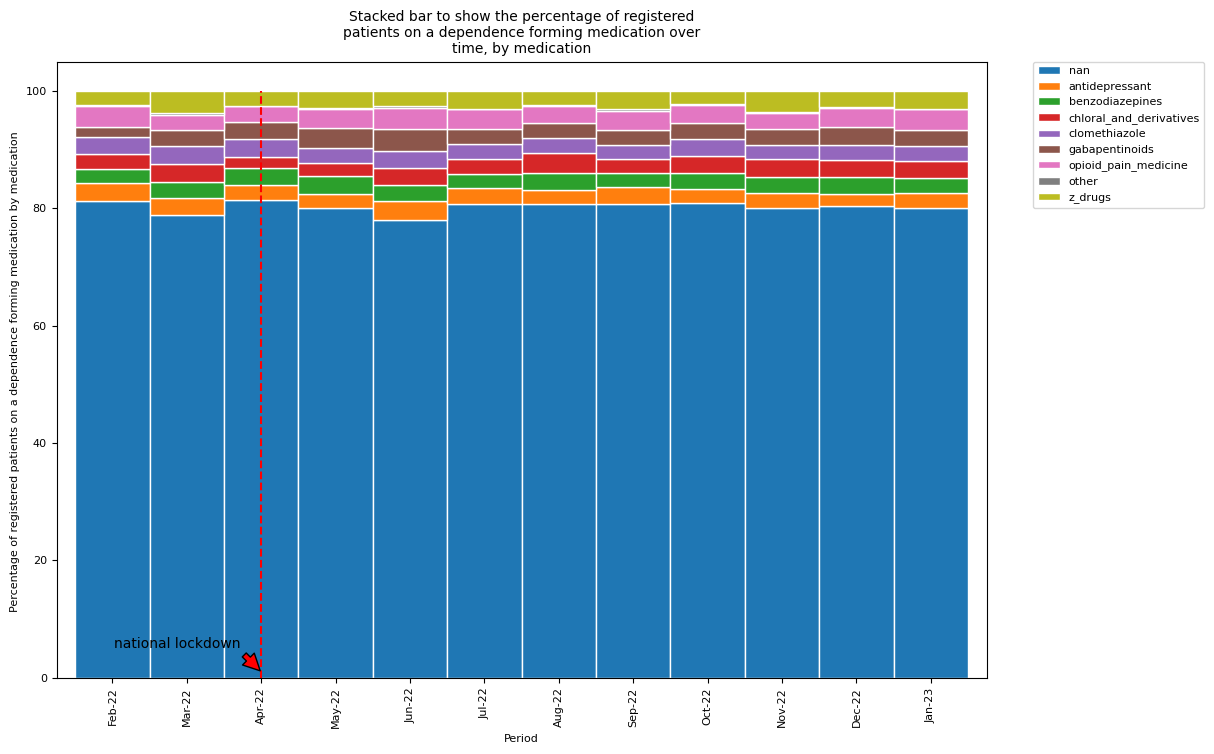

In [9]:
df_med_stacked = pd.DataFrame(df_measure_dfm_medications_grouped_rate)
df_med_stacked.head()
totm = df_med_stacked.sum(axis=1)
perm = df_med_stacked.div(totm, axis=0).mul(100).round(2)
ax = perm.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by medication ', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
# for bars in ax.containers:
    # ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by medication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_grouped_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()



In [10]:
print(tabulate(perm.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perm.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Feb-22   81.3              2.95               2.45                        2.6             2.85              1.65                    3.65      0.1       2.45
date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Jan-23   80.1              2.55               2.55                        2.8              2.7               2.6                     3.6      0.1          3


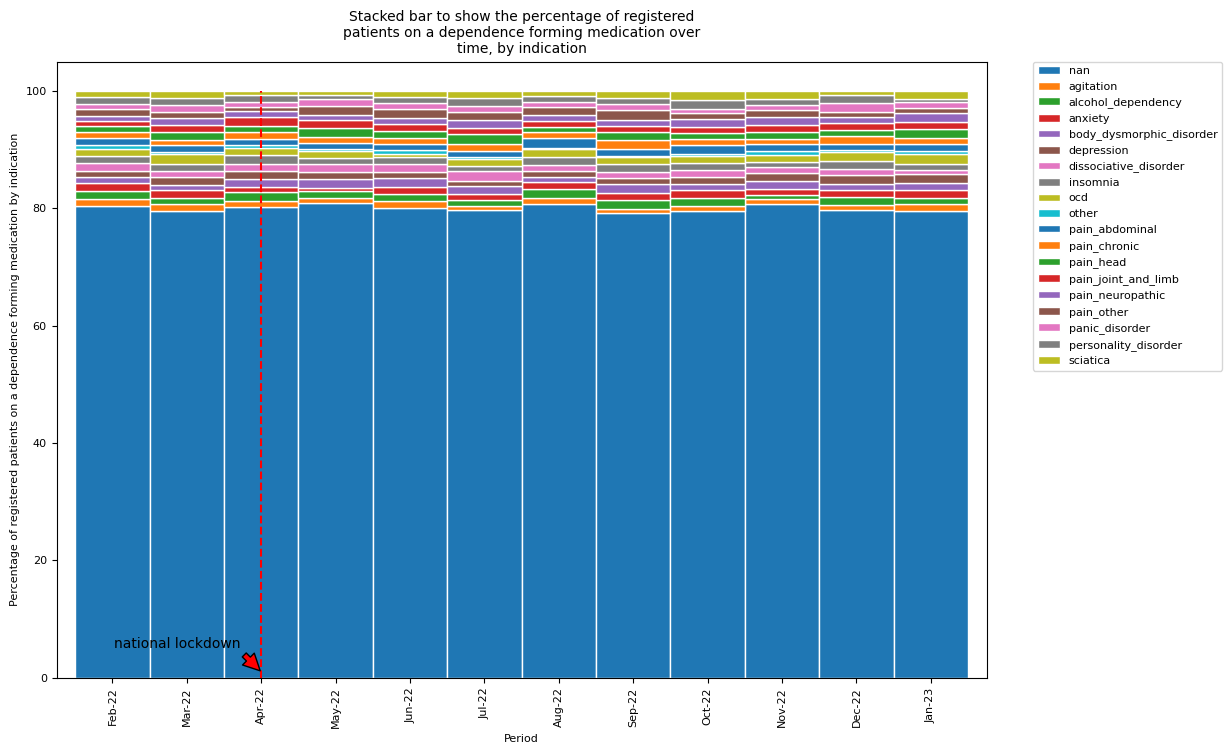

In [11]:
df_ind_stacked = pd.DataFrame(df_measure_dfm_indications_grouped_rate)
df_ind_stacked.head()
toti = df_ind_stacked.sum(axis=1)
peri = df_ind_stacked.div(toti, axis=0).mul(100).round(2)
ax = peri.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by indication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
# for bars in ax.containers:
    # ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by indication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_indications_grouped_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [12]:
print(tabulate(peri.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(peri.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      nan    agitation    alcohol_dependency    anxiety    body_dysmorphic_disorder    depression    dissociative_disorder    insomnia    ocd    other    pain_abdominal    pain_chronic    pain_head    pain_joint_and_limb    pain_neuropathic    pain_other    panic_disorder    personality_disorder    sciatica
------  -----  -----------  --------------------  ---------  --------------------------  ------------  -----------------------  ----------  -----  -------  ----------------  --------------  -----------  ---------------------  ------------------  ------------  ----------------  ----------------------  ----------
Feb-22  80.45          1.1                   1.4       1.35                         1.1             1                      1.3         1.2    1.2     0.75               1.2            0.95            1                   0.95                 0.8           1.2               0.9                    1.15           1
date      nan    agitation    alcohol_dependency    anxiety  